# DATA20001 Deep Learning - Group Project
## Text project

**Due Thursday, December 13, before 23:59.**

The task is to learn to assign the correct labels to news articles.  The corpus contains ~850K articles from Reuters.  The test set is about 10% of the articles. The data is unextracted in XML files.

We're only giving you the code for downloading the data, and how to save the final model. The rest you'll have to do yourselves.

Some comments and hints particular to the project:

- One document may belong to many classes in this problem, i.e., it's a multi-label classification problem. In fact there are documents that don't belong to any class, and you should also be able to handle these correctly. Pay careful attention to how you design the outputs of the network (e.g., what activation to use) and what loss function should be used.
- You may use word-embeddings to get better results. For example, you were already using a smaller version of the GloVE  embeddings in exercise 4. Do note that these embeddings take a lot of memory. 
- In the exercises we used e.g., `torchvision.datasets.MNIST` to handle the loading of the data in suitable batches. Here, you need to handle the dataloading yourself.  The easiest way is probably to create a custom `Dataset`. [See for example here for a tutorial](https://github.com/utkuozbulak/pytorch-custom-dataset-examples).

In [4]:
import pandas as pd
import json
from pprint import pprint

###  Data exploring with Pandas

In [40]:
reuters_df = pd.DataFrame(columns=['topic_codes', 'headline', 'text'])

json_fp = './train/reuters.json'
# json_fp = './reuters_sample.json'

with open(json_fp, 'r') as file:
    reuters_dict = json.load(file)

In [52]:
df = pd.DataFrame(columns=['codes', 'headline', 'text'])

max_depth = 20000
dict_length = len(reuters_dict)
iter_length = min(max_depth, dict_length)

idx = 0
for key, content in reuters_dict.items():
    
    idx+=1
    if idx % 1000 == 0:
        print(f'{idx}/{iter_length}')
        
    if idx> max_depth:
        break
    
    raw_text = ''
    for paragraph in content['text'].values():
        for line in paragraph:
            raw_text += f'{line} '    
    df.loc[key] = [content['topic_codes'], content['headline'], raw_text]

1000/299773
2000/299773
3000/299773
4000/299773
5000/299773
6000/299773
7000/299773
8000/299773
9000/299773
10000/299773
11000/299773
12000/299773
13000/299773
14000/299773
15000/299773
16000/299773
17000/299773
18000/299773
19000/299773
20000/299773


In [53]:
df.head()

,codes,headline,text
19970602_632411newsML,"[C12, CCAT, GCAT, GCRIM]",Seoul court jails 10 in Hanbo corruption scandal.,A South Korean court on Monday handed lengthy ...
19970602_630414newsML,"[M13, M132, MCAT]","Rouble fixed at 3,370 per mark in Moscow.","The rouble was set at 3,370 to the German mark..."
19970602_629922newsML,"[M11, MCAT]","SAKU FALLS ON SUSPENSION FEAR, OTHERS QUIET.",Saku Brewery fell 17 percent on the Tallinn bo...
19970602_632627newsML,[GSPO],Coca-Cola's Powerade is NHL choice - WSJ.,Coca-Cola Co's Powerade may soon be the sport ...
19970602_630308newsML,"[C15, C152, CCAT, M11, MCAT]","BUCHAREST BOURSE AVERAGE PRICES UP, VOLUME SLIPS.",The average prices of most Bucharest bourse li...


#### Checking for missing headlines

In [54]:
df[df['headline'].isnull()]

,codes,headline,text


#### What are we dealing with?

In [55]:
df.headline.apply(len).describe()

count    20000.000000
mean        44.717700
std          6.629631
min         16.000000
25%         41.000000
50%         46.000000
75%         50.000000
max        102.000000
Name: headline, dtype: float64

In [56]:
df.text.apply(len).describe()

count    20000.00000
mean      1474.28885
std       1324.19884
min         78.00000
25%        605.00000
50%       1103.00000
75%       1980.25000
max      47728.00000
Name: text, dtype: float64

count    20000.00000
mean         3.20945
std          1.45667
min          0.00000
25%          2.00000
50%          3.00000
75%          4.00000
max         14.00000
Name: codes, dtype: float64


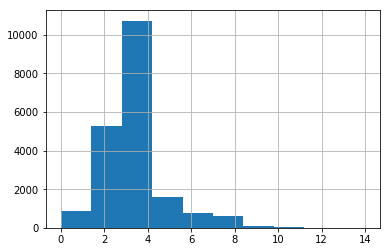

In [57]:

print(df.codes.apply(len).describe())
df.codes.apply(len).hist()

In [58]:
codesList = df.codes.values
codes = []
for cs in codesList:
    codes += cs
print(len(set(codes)))

100


### Pytorch

In [38]:
from ReutersDataset import ReutersDataset

In [39]:
reuters_dataset = ReutersDataset(json_fp, 1000)



## Save your model

It might be useful to save your model if you want to continue your work later, or use it for inference later.

In [ ]:
torch.save(model.state_dict(), 'model.pkl')

The model file should now be visible in the "Home" screen of the jupyter notebooks interface.  There you should be able to select it and press "download".

## Download test set

The testset will be made available during the last week before the deadline and can be downloaded in the same way as the training set.

## Predict for test set

You will be asked to return your predictions a separate test set.  These should be returned as a matrix with one row for each test article.  Each row contains a binary prediction for each label, 1 if it's present in the image, and 0 if not. The order of the labels is the order of the label (topic) codes.

An example row could like like this if your system predicts the presense of the second and fourth topic:

    0 1 0 1 0 0 0 0 0 0 0 0 0 0 ...
    
If you have the matrix prepared in `y` you can use the following function to save it to a text file.

In [ ]:
np.savetxt('results.txt', y, fmt='%d')

## Questions

* how much data we need per label